In [11]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import platform

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("=" * 60)
print("2회차 실습 과제: 확률 기초와 확률분포")
print("=" * 60)

2회차 실습 과제: 확률 기초와 확률분포


In [5]:
print("\n[문제 1-1] 의료 검사 확률 분석")
print("=" * 50)

# 주어진 정보
p_disease = 0.02          # P(질병) = 2%
p_healthy = 1 - p_disease  # P(정상) = 98%
sensitivity = 0.95         # P(양성|질병) = 95%
specificity = 0.90         # P(음성|정상) = 90%

print(f"질병 보유율: {p_disease:.1%}")
print(f"민감도 P(양성|질병): {sensitivity:.1%}")
print(f"특이도 P(음성|정상): {specificity:.1%}")

# TODO (a): 위양성률 계산
p_false_positive = 1 - specificity
print(f"\n(a) 위양성률 P(양성|정상): {p_false_positive}")

# TODO (b): 전체 양성 확률 P(양성) 계산
p_positive = (sensitivity * p_disease) + (p_false_positive * p_healthy)
print(f"(b) 전체 양성 확률 P(양성): {p_positive}")

# TODO (c): 양성예측도 계산
ppv = (sensitivity * p_disease) / p_positive
print(f"(c) 양성예측도 P(질병|양성): {ppv}")


[문제 1-1] 의료 검사 확률 분석
질병 보유율: 2.0%
민감도 P(양성|질병): 95.0%
특이도 P(음성|정상): 90.0%

(a) 위양성률 P(양성|정상): 0.09999999999999998
(b) 전체 양성 확률 P(양성): 0.11699999999999998
(c) 양성예측도 P(질병|양성): 0.16239316239316243


In [9]:
print("\n[문제 1-2] 주사위 독립/종속 분석")
print("=" * 50)

# 표본공간: 두 주사위의 모든 경우 (6 × 6 = 36가지)
total_outcomes = 36

# TODO (a): 각 확률 계산
p_A = 18/36
p_B = 6/36
p_A_and_B = 3/36

print(f"(a) P(A) = {p_A}")
print(f"    P(B) = {p_B}")
print(f"    P(A ∩ B) = {p_A_and_B}")


# TODO (b): 독립성 검정
p_A_times_B = p_A * p_B

print(f"\n(b) P(A) × P(B) = {p_A_times_B}")
print(f"    P(A ∩ B) = {p_A_and_B}")
print(f"    → 독립 여부: {"독립" if p_A_times_B == p_A_and_B else "종속"}")

# TODO (c): 조건부 확률 계산
p_B_given_A = p_A_and_B / p_A
print(f"\n(c) P(B|A) = {p_B_given_A}")
print(f"    P(B) = {p_B}")
print(f"    → 해석: {"독립" if p_B_given_A == p_B else "종속"}")


[문제 1-2] 주사위 독립/종속 분석
(a) P(A) = 0.5
    P(B) = 0.16666666666666666
    P(A ∩ B) = 0.08333333333333333

(b) P(A) × P(B) = 0.08333333333333333
    P(A ∩ B) = 0.08333333333333333
    → 독립 여부: 독립

(c) P(B|A) = 0.16666666666666666
    P(B) = 0.16666666666666666
    → 해석: 독립


In [13]:
from scipy.stats import binom

print("\n[문제 2-1] 제품 품질 검사")
print("=" * 50)

# 파라미터
n = 50      # 검사 제품 수
p = 0.03    # 불량률

print(f"검사 제품 수: {n}개")
print(f"불량률: {p:.1%}")

# TODO: 분포 생성 및 확률 계산

# (a) 정확히 2개 불량 확률
p_exactly_2 = binom.pmf(2, n, p)

print(f"\n(a) P(X = 2) = {p_exactly_2}")


# (b) 3개 이하 확률
p_at_most_3 = binom.cdf(3, n, p)

print(f"(b) P(X ≤ 3) = {p_at_most_3}")


# (c) 5개 이상 확률
p_at_least_5 = 1 - binom.cdf(4, n, p)

print(f"(c) P(X ≥ 5) = {p_at_least_5}")


# (d) 기대값과 표준편차
expected_value = n * p
std_dev = (n * p * (1 - p)) ** 0.5

print(f"\n(d) 기대값 E[X] = {expected_value}")
print(f"    표준편차 σ = {std_dev}")



[문제 2-1] 제품 품질 검사
검사 제품 수: 50개
불량률: 3.0%

(a) P(X = 2) = 0.2555182020624052
(b) P(X ≤ 3) = 0.9372400722665815
(c) P(X ≥ 5) = 0.016810645355951337

(d) 기대값 E[X] = 1.5
    표준편차 σ = 1.2062338081814818


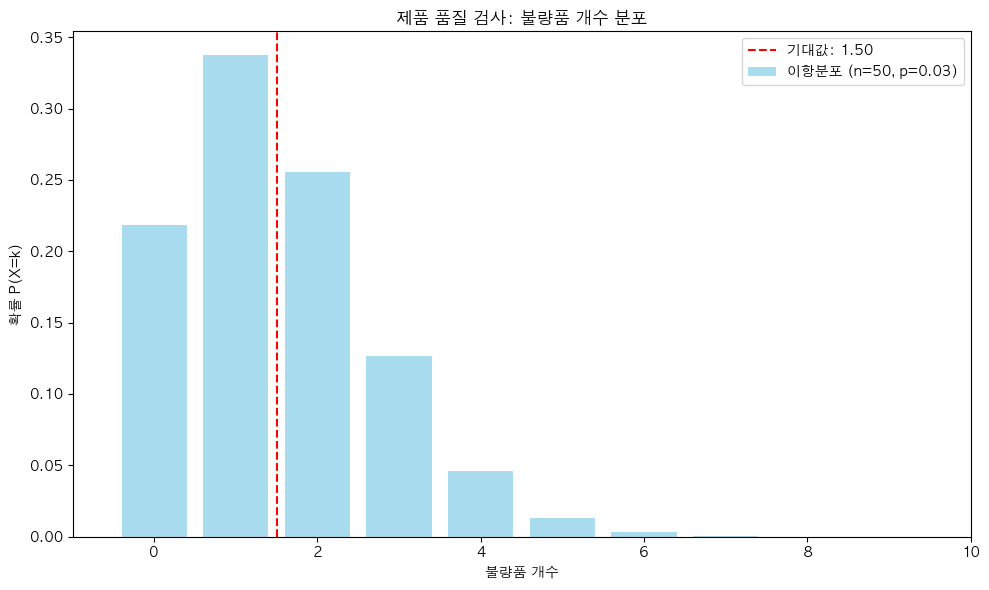

In [15]:
# (e) PMF 시각화
fig, ax = plt.subplots(figsize=(10, 6))

# TODO: 시각화 코드 작성
x = np.arange(0, n + 1)
y = binom.pmf(x, n, p)
ax.bar(x, y, color='skyblue', alpha=0.7, label='이항분포 (n=50, p=0.03)')
ax.set_xlim(-1, 10)  # 불량률이 낮아 10개 이상은 거의 0이므로 범위를 좁히면 더 잘 보입니다.
ax.axvline(n * p, color='red', linestyle='--', label=f'기대값: {n*p:.2f}')
ax.legend()

ax.set_xlabel('불량품 개수')
ax.set_ylabel('확률 P(X=k)')
ax.set_title('제품 품질 검사: 불량품 개수 분포', fontweight='bold')

plt.tight_layout()
plt.show()

In [20]:
from scipy.stats import poisson

print("\n[문제 2-2] 고객 서비스 센터")
print("=" * 50)

# 파라미터
lam = 8  # 시간당 평균 문의 건수

print(f"시간당 평균 문의 건수: {lam}건")

# TODO: 분포 생성 및 확률 계산

# (a) 정확히 10건 확률
p_exactly_10 = poisson.pmf(10, lam)

print(f"\n(a) P(X = 10) = {p_exactly_10}")


# (b) 5건 이하 확률
p_at_most_5 = poisson.cdf(5, lam)

print(f"(b) P(X ≤ 5) = {p_at_most_5}")


# (c) 12건 이상 확률
p_at_least_12 = 1 - poisson.cdf(11, lam)

print(f"(c) P(X ≥ 12) = {p_at_least_12}")


# (d) 1명으로 충분할 확률
p_manageable = poisson.cdf(10, lam)

print(f"\n(d) 상담원 1명으로 처리 가능 확률 = {p_manageable}")


# (e) 95% 커버리지를 위한 용량
capacity_95 = poisson.ppf(0.95, lam)

print(f"(e) 95% 대비 용량: {capacity_95}건")




[문제 2-2] 고객 서비스 센터
시간당 평균 문의 건수: 8건

(a) P(X = 10) = 0.09926153383153544
(b) P(X ≤ 5) = 0.1912360620796254
(c) P(X ≥ 12) = 0.11192400101851852

(d) 상담원 1명으로 처리 가능 확률 = 0.8158857925585465
(e) 95% 대비 용량: 13.0건


In [21]:
from scipy.stats import expon

print("\n[문제 3-1] 전자제품 수명 분석")
print("=" * 50)

# 파라미터
mean_life = 500  # 평균 수명 (시간)

print(f"평균 수명: {mean_life}시간")

# TODO: 분포 생성 및 확률 계산

# (a) 300시간 이내 고장 확률
p_fail_300 = expon.cdf(300, scale=mean_life)

print(f"\n(a) P(X ≤ 300) = {p_fail_300}")


# (b) 700시간 이상 작동 확률
p_survive_700 = 1 - expon.cdf(700, scale=mean_life)

print(f"(b) P(X ≥ 700) = {p_survive_700}")


# (c) 무기억성 활용 — 추가 200시간 작동 확률
p_additional_200 = 1 - expon.cdf(200, scale=mean_life)

print(f"\n(c) P(추가 200시간 작동) = {p_additional_200}")


# (d) 하위 10% 고장 시점 (보증 기간)
warranty_time = expon.ppf(0.1, scale=mean_life)

print(f"(d) 하위 10% 고장 시점: {warranty_time}시간")


[문제 3-1] 전자제품 수명 분석
평균 수명: 500시간

(a) P(X ≤ 300) = 0.4511883639059736
(b) P(X ≥ 700) = 0.24659696394160646

(c) P(추가 200시간 작동) = 0.6703200460356393
(d) 하위 10% 고장 시점: 52.680257828913156시간


In [23]:
from scipy.stats import norm

print("\n[문제 3-2] 시험 점수 분석")
print("=" * 50)

# 파라미터
mu = 72     # 평균
sigma = 12  # 표준편차

print(f"평균: {mu}점")
print(f"표준편차: {sigma}점")

# TODO: 분포 생성 및 확률 계산

# (a) 60점 이상 84점 이하 확률
p_between = norm.cdf(84, loc=mu, scale=sigma) - norm.cdf(60, loc=mu, scale=sigma)

print(f"\n(a) P(60 ≤ X ≤ 84) = {p_between}")


# (b) 상위 15% 커트라인
top_15_cutoff = norm.ppf(0.85, loc=mu, scale=sigma)

print(f"(b) 상위 15% 커트라인: {top_15_cutoff}점")


# (c) 하위 5% (F 학점) 기준
f_grade_cutoff = norm.ppf(0.05, loc=mu, scale=sigma)

print(f"(c) F 학점 기준 (하위 5%): {f_grade_cutoff}점")


# (d) 90점의 백분위
p_below_90 = norm.cdf(90, loc=mu, scale=sigma)
top_percentile_90 = (1 - p_below_90) * 100

print(f"(d) 90점 학생의 위치: 상위 {top_percentile_90}%")



[문제 3-2] 시험 점수 분석
평균: 72점
표준편차: 12점

(a) P(60 ≤ X ≤ 84) = 0.6826894921370859
(b) 상위 15% 커트라인: 84.43720067392547점
(c) F 학점 기준 (하위 5%): 52.26175647658233점
(d) 90점 학생의 위치: 상위 6.6807201268858085%


In [25]:
print("\n[문제 4] Z-score와 상대적 위치 비교")
print("=" * 50)

# 주어진 정보
math_score, math_mean, math_std = 78, 65, 10
eng_score, eng_mean, eng_std = 85, 75, 15

print("영희의 성적:")
print(f"  수학: {math_score}점 (반 평균 {math_mean}, 표준편차 {math_std})")
print(f"  영어: {eng_score}점 (반 평균 {eng_mean}, 표준편차 {eng_std})")

# TODO (a): Z-score 계산
z_math = (math_score - math_mean) / math_std
z_eng = (eng_score - eng_mean) / eng_std

print(f"\n(a) Z-score 계산")
print(f"    수학: Z = {z_math}")
print(f"    영어: Z = {z_eng}")


# TODO (b): 상위 % 계산
top_pct_math = (1 - norm.cdf(z_math)) * 100
top_pct_eng = (1 - norm.cdf(z_eng)) * 100

print(f"\n(b) 상위 % 계산")
print(f"    수학: 상위 {top_pct_math}%")
print(f"    영어: 상위 {top_pct_eng}%")


# TODO (c): 결론 작성
print("\n(c) 결론:")
print("    수학의 z-score가 높으므로 상대적으로 수학 성적이 더 우수하다고 할 수 있다")




[문제 4] Z-score와 상대적 위치 비교
영희의 성적:
  수학: 78점 (반 평균 65, 표준편차 10)
  영어: 85점 (반 평균 75, 표준편차 15)

(a) Z-score 계산
    수학: Z = 1.3
    영어: Z = 0.6666666666666666

(b) 상위 % 계산
    수학: 상위 9.68004845856103%
    영어: 상위 25.24925375469229%

(c) 결론:
    수학의 z-score가 높으므로 상대적으로 수학 성적이 더 우수하다고 할 수 있다


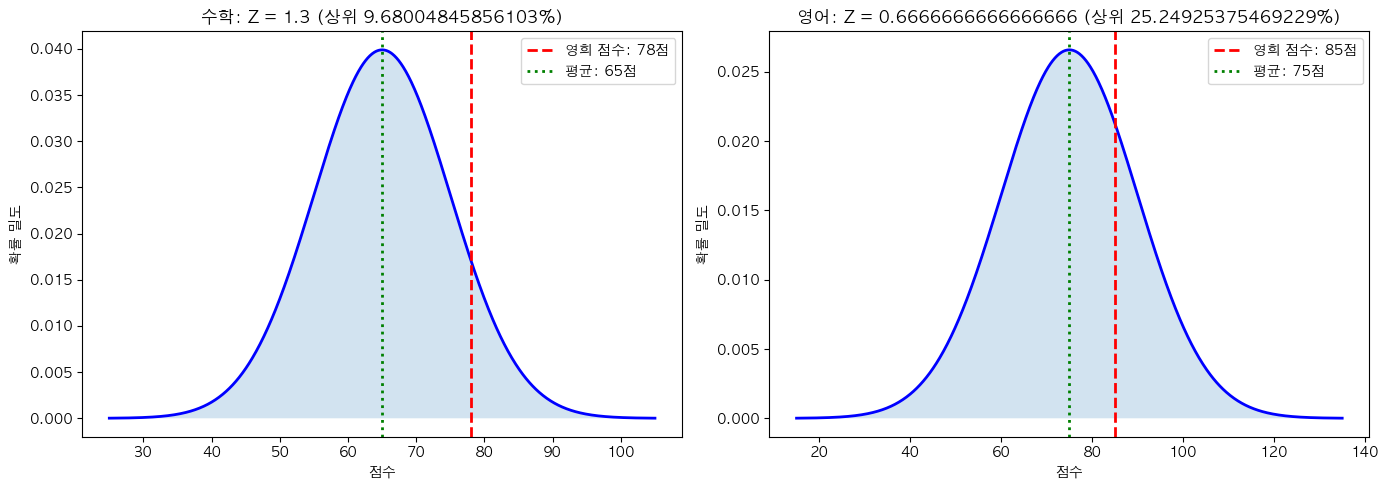

In [26]:
# 시각화: 두 과목 비교
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 왼쪽: 수학 분포
x_math = np.linspace(math_mean - 4*math_std, math_mean + 4*math_std, 1000)
y_math = stats.norm.pdf(x_math, math_mean, math_std)
axes[0].plot(x_math, y_math, 'b-', linewidth=2)
axes[0].fill_between(x_math, y_math, alpha=0.2)
axes[0].axvline(math_score, color='red', linestyle='--', linewidth=2, label=f'영희 점수: {math_score}점')
axes[0].axvline(math_mean, color='green', linestyle=':', linewidth=2, label=f'평균: {math_mean}점')
axes[0].set_xlabel('점수')
axes[0].set_ylabel('확률 밀도')
axes[0].set_title(f'수학: Z = {z_math if z_math else "?"} (상위 {top_pct_math if top_pct_math else "?"}%)', fontweight='bold')
axes[0].legend()

# 오른쪽: 영어 분포
x_eng = np.linspace(eng_mean - 4*eng_std, eng_mean + 4*eng_std, 1000)
y_eng = stats.norm.pdf(x_eng, eng_mean, eng_std)
axes[1].plot(x_eng, y_eng, 'b-', linewidth=2)
axes[1].fill_between(x_eng, y_eng, alpha=0.2)
axes[1].axvline(eng_score, color='red', linestyle='--', linewidth=2, label=f'영희 점수: {eng_score}점')
axes[1].axvline(eng_mean, color='green', linestyle=':', linewidth=2, label=f'평균: {eng_mean}점')
axes[1].set_xlabel('점수')
axes[1].set_ylabel('확률 밀도')
axes[1].set_title(f'영어: Z = {z_eng if z_eng else "?"} (상위 {top_pct_eng if top_pct_eng else "?"}%)', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()